# Regresión lineal simple
### Modelos no paramétricos y de regresión
##### Por: Jorge Iván Reyes Hernández

## 1. Obtener datos
- Muestreo/experimentos.
- Web Scraping.
- etc.

## 2. EDA
- Gráfico de dispersión.

## 3. Supuestos del modelo*
Modelo: $Y = \beta_0 + \beta_1 x + \epsilon$, $\epsilon \sim \mathcal{N}(0,\sigma^2)$.
- __Linealidad__: $\mathbb{E}(Y|x) = \beta_0 + \beta_1 x \iff \mathbb{E}(\epsilon) = 0$.
- __Varianza contante__: Dado $x\in\mathbb{R}$, la varianza de $Y$ es constante $\iff$ $\mathbb{V}ar(\epsilon) = \sigma^{2}$ (independiente del $x$ dado).
- __Independencia__ (no correlación): Si $i\neq j$, $Y_i \perp Y_j \iff \epsilon_i \perp \epsilon_j$ ($\mathbb{C}ov (\epsilon_i, \epsilon_j) = 0$).
- __Normalidad__: Dado $x\in\mathbb{R}, Y$ es una v.a normal $\iff$ $\epsilon$ es una v.a normal.

## 4. Ajustar/entrenar modelo
Estimar $\beta_0, \beta_1, \sigma^{2}$ usando:
- Mínimos cuadrados.
- Máxima verosimilitud.

Bajo el supuesto distribucional ($\epsilon \sim \mathcal{N}(0,\sigma^2)$) estos estimadores coindicen ($\hat{\beta}_{i,ML} = \hat{\beta}_{i,MC}$, $i\in\{0,1\}$).

## 5. Evaluar modelo
- Coeficiente de determinación $R^{2}:\mathbb{R}^{n}\times\mathbb{R}^{n} \to [0,1]\subset\mathbb{R}$.

$R^{2}$: Proporción de la variabilidad total de $y$ que es explicada por el modelo.

$R^{2} = 1$: El $100\%$ de la variabilidad muestral en $y$ puede ser atribuida al hecho de que $x$ y $y$ están relacionadas linealmente.


## 6. Verificación de supuestos (análisis de residuales)
1. __Independencia__.
- Autocorrelograma (de los residuales muestrales $e_i$).
- Prueba de Durbin-Watson.
2. __Varianza contante__.
- Gráfico de dispersión ($e$ vs $\hat{y}$)
- Pruebas de Cook-Weisberg o de Breusch-Pagan.

3. __Normalidad__.
- qq-plot (de los residuales muestrales $e_i$).
- Pruebas de Kolmogorov-Smirnov, Anderson-Daring, etc (para los residuales muestrales $e_i$).

_Nota: Pueden usar los residuales estandarizados_
$$
    e_i ^{*} = \frac{y_i - \hat{y}_i}{s_e\sqrt{1-\frac{1}{n} - \frac{(x_i - \bar{x})^{2}}{S_{xx}} }}
$$
con $s_e = \sqrt{SSE/(n-2)}$, $i\in\{1,\ldots,n\}$, $SSE = \sum_{i=1}^{n}(y_i - \hat{y}_i)^{2}$

### Ejemplo
#### ¿El estrés realmente acelera el envejecimiento?
Un estudio descrito en el artículo "Acortamiento acelerado de telómeros en respuesta al estrés" (Proc. Nat. Acad. Sci 2004:17312-17315) investigó la relación entre $x:$ "Nivel de estrés percibido" (en escala cuantitativa) y $y:$ "Longitud de los telómeros" (una medida biológica de longevidad celular; longitudes de telómeros más pequeñas indican una vida útil más corta a nivel celular). Se tomaron muestras $(x_i, y_i)$ a 38 individuos (archivo stress_aging.csv). Realice un análisis de regresión.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import qqplot

##### Datos

In [2]:
data = pd.read_csv("stress_aging.csv")

In [3]:
data

,stress,aging
0,14,1.30
1,17,1.32
2,14,1.08
3,27,1.02
4,22,1.24
5,12,1.18
6,22,1.18
7,24,1.12
8,25,0.94
9,18,1.46


###### EDA

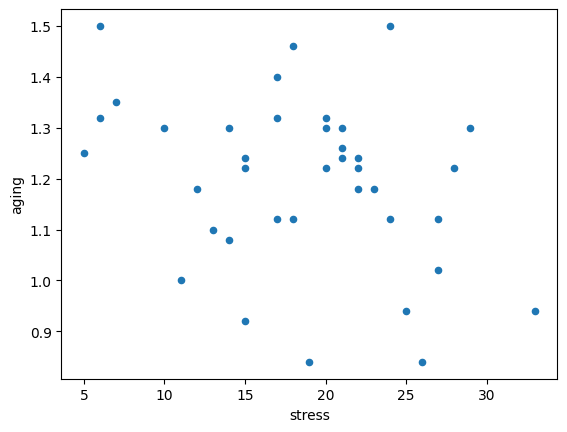

In [4]:
ax1 = data.plot.scatter(x="stress", y="aging")

##### Ajuste del modelo

In [5]:
Y = data["aging"]
X = data["stress"]

In [6]:
Y

0     1.30
1     1.32
2     1.08
3     1.02
4     1.24
5     1.18
6     1.18
7     1.12
8     0.94
9     1.46
10    1.22
11    1.30
12    0.84
13    1.18
14    1.22
15    0.92
16    1.12
17    1.40
18    1.32
19    1.35
20    1.00
21    1.24
22    1.25
23    1.26
24    1.50
25    1.24
26    1.50
27    1.30
28    1.22
29    0.84
30    1.30
31    1.12
32    1.12
33    1.22
34    1.10
35    0.94
36    1.32
37    1.30
Name: aging, dtype: float64

In [7]:
X

0     14
1     17
2     14
3     27
4     22
5     12
6     22
7     24
8     25
9     18
10    28
11    21
12    19
13    23
14    15
15    15
16    27
17    17
18     6
19     7
20    11
21    15
22     5
23    21
24    24
25    21
26     6
27    20
28    22
29    26
30    10
31    18
32    17
33    20
34    13
35    33
36    20
37    29
Name: stress, dtype: int64

In [8]:
model = sm.OLS(Y,sm.add_constant(X))

In [9]:
results = model.fit()

In [10]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  aging   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     3.963
Date:                Wed, 12 Apr 2023   Prob (F-statistic):             0.0541
Time:                        22:59:34   Log-Likelihood:                 16.955
No. Observations:                  38   AIC:                            -29.91
Df Residuals:                      36   BIC:                            -26.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3388      0.076     17.656      0.000       1.185       1.493
stress        -0.0077      0.004     -1.991      0.054      -0.015       0.000
==============================================================================
Omnibus:                        0.984   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.688
Skew:                          -0.327   Prob(JB):                        0.709
Kurtosis:                       2.924   Cond. No.                         58.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Parámetros estimados

results.params

const     1.338778
stress   -0.007661
dtype: float64

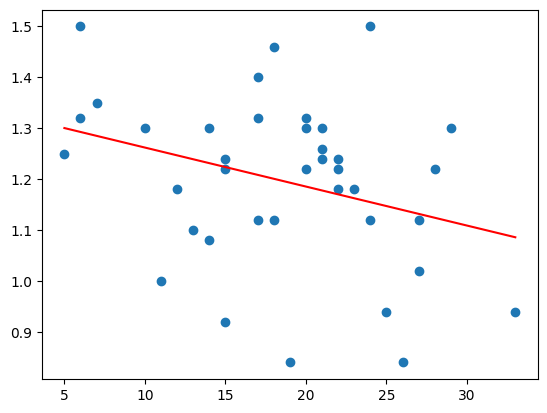

In [12]:
x = np.linspace(data["stress"].min(), data["stress"].max())
y = np.matmul(sm.add_constant(x), results.params)

plt.plot(x,y, "r")
plt.scatter(data["stress"], data["aging"])
plt.show()

##### Evaluación del modelo

In [13]:
# Coeficiente de determinación

results.rsquared

0.09916697197643265

###### Análisis de residuales


In [14]:
res = results.resid

#### Independencia
- Autocorrelograma

[statsmodels.graphics.tsaplots.plot_acf](https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html)

[Interpreting ACF or Auto-correlation plot](https://medium.com/analytics-vidhya/interpreting-acf-or-auto-correlation-plot-d12e9051cd14)

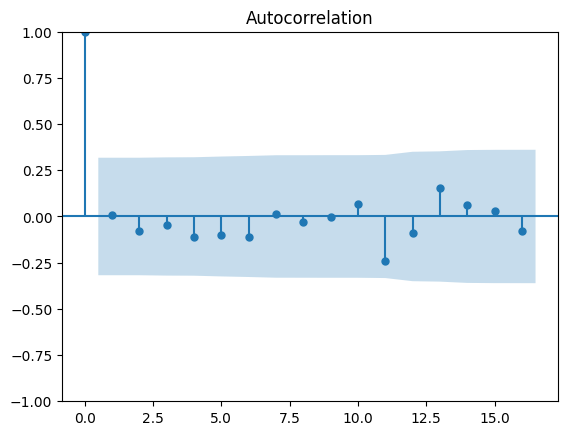

In [15]:
# Autocorrelograma

plot_acf(res)
plt.show()

- Prueba de Durbin-Watson

[Durbin-Watson DW test for autocorrelation](https://www.reneshbedre.com/blog/durbin-watson-test.html)

Del resumen: Durbin-Watson: 	1.944

Si la estadística es 2, no hay autocorrelación.

Si la estadística es menor que 2, hay autocorrelación positiva.

Si la estadística es mayor que 2, hay autocorrelación negativa.

__Punto extra si corren la prueba DW de R en Python__ (límite 20-04-23)

[Calling R from Python](https://rviews.rstudio.com/2022/05/25/calling-r-from-python-with-rpy2/)

#### Varianza constante.
- Gráfico de dispersión

In [16]:
y_hat = results.params[0] + results.params[1]*X

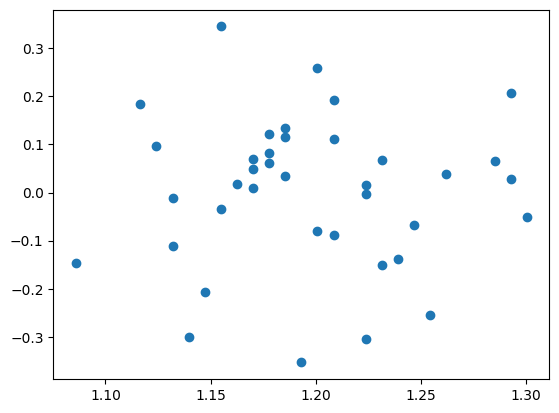

In [17]:
plt.scatter(x=y_hat, y=res);

- Prueba de Breusch-Pagan

Hip. nula: la varianza es constante

[How to Perform a Breusch-Pagan Test in Python](https://www.geeksforgeeks.org/how-to-perform-a-breusch-pagan-test-in-python/)

In [18]:
# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(results.resid, results.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 0.3518811946684577),
 ('p-value', 0.5530501583398384),
 ('f-value', 0.33647691863611745),
 ('f p-value', 0.5654831049396662)]

3. __Normalidad__.
- qq-plot (de los residuales muestrales $e_i$).


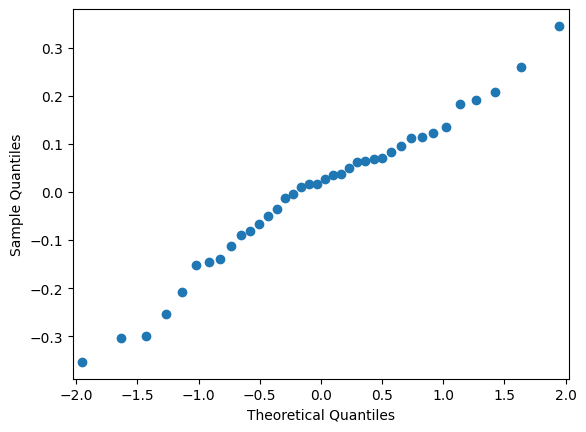

In [19]:
fig = sm.qqplot(res)
plt.show()

- Pruebas de Kolmogorov-Smirnov, Anderson-Daring, etc.

Hip. nula: los residuales se distribuyen normal.

In [20]:
stats.anderson(res)

AndersonResult(statistic=0.3774309238372453, critical_values=array([0.529, 0.603, 0.723, 0.844, 1.004]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-3.2722362831057244e-16, scale=0.15695427313608998)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [21]:
stats.shapiro(res)

ShapiroResult(statistic=0.9775760173797607, pvalue=0.6314409375190735)

__Punto extra: concluir__ (límite 20-04-23)